O Expoente de Hurst

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
def hurst_exponent(ts):
    lags = range(2, 21)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    hurst = np.polyfit(np.log(lags), np.log(tau), 1)[0]
    return hurst

In [41]:
path = "C:/Users/gabri/Documents/GitHub/Safra-Algorithmic-Trading/bova11.xlsx"
sheet = "price"

df = pd.read_excel(path, sheet_name=sheet)
df1 = df.sort_values('Data').reset_index().loc[:,['Data','BOVA11']].copy()

df1['log_ret'] = np.log(df1['BOVA11'] / df['BOVA11'].shift(1))

df1

,Data,BOVA11,log_ret
0,2008-11-28,36.595870,NaN
1,2008-12-01,34.744914,-0.051902
2,2008-12-02,35.001588,0.007360
3,2008-12-03,35.293783,0.008313
4,2008-12-04,35.122046,-0.004878
...,...,...,...
3721,2023-09-25,112.386518,-0.000710
3722,2023-09-26,110.711942,-0.015012
3723,2023-09-27,110.837986,0.001138
3724,2023-09-28,112.205870,0.012266


In [42]:
df1['DataIndex'] = df1['Data'].copy()
df1['DataIndex'] = pd.to_datetime(df1['DataIndex'])
df1.set_index('DataIndex', inplace=True)
df1

,Data,BOVA11,log_ret
DataIndex,,,
2008-11-28,2008-11-28,36.595870,NaN
2008-12-01,2008-12-01,34.744914,-0.051902
2008-12-02,2008-12-02,35.001588,0.007360
2008-12-03,2008-12-03,35.293783,0.008313
2008-12-04,2008-12-04,35.122046,-0.004878
...,...,...,...
2023-09-25,2023-09-25,112.386518,-0.000710
2023-09-26,2023-09-26,110.711942,-0.015012
2023-09-27,2023-09-27,110.837986,0.001138


In [43]:
# Calculate the Hurst exponent for each data point based on previous data
hurst_values = []

n = 90

for i in range(len(df1)):
    if i >= n:  # Minimum required data points for calculation
        subset = df1['BOVA11'].iloc[i-n:i]  # Use the previous n data points
        hurst_value = hurst_exponent(subset.values)
        hurst_values.append(hurst_value)
    else:
        hurst_values.append(None)  # For the initial data points with insufficient history


In [44]:
# Column 'Hurst' to store the Hurst exponent values
df1['Hurst'] = hurst_values

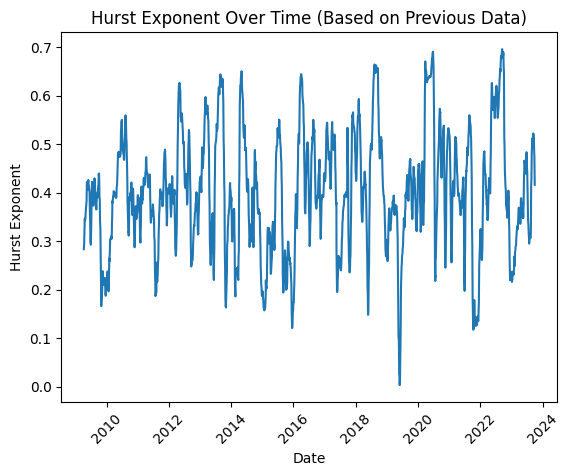

In [45]:
# Plot the Hurst exponent values over time
plt.plot(df1['Data'], df1['Hurst'])
plt.title('Hurst Exponent Over Time (Based on Previous Data)')
plt.xlabel('Date')
plt.ylabel('Hurst Exponent')
plt.xticks(rotation=45)
plt.show()

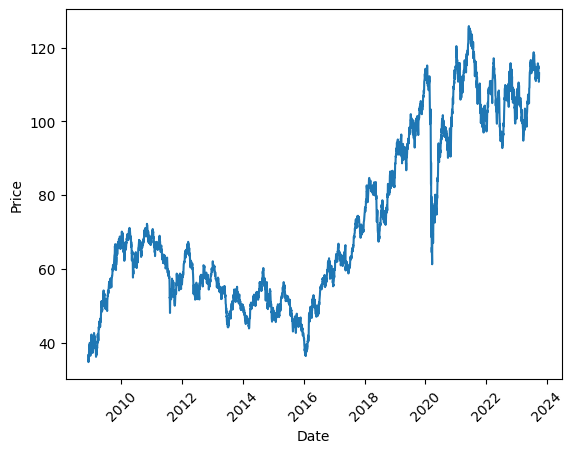

In [46]:
data = df1['BOVA11'].values
plt.plot(df1.index,data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Categorize price as "trending," "random," or "mean-reverting"
df1['Trend_Category'] = pd.cut(df1['Hurst'], bins=[0, 0.45, 0.55, 1], labels=['mean-rev', 'rand', 'trend'])
df1

,Data,BOVA11,log_ret,Hurst,Trend_Category
DataIndex,,,,,
2008-11-28,2008-11-28,36.595870,NaN,NaN,NaN
2008-12-01,2008-12-01,34.744914,-0.051902,NaN,NaN
2008-12-02,2008-12-02,35.001588,0.007360,NaN,NaN
2008-12-03,2008-12-03,35.293783,0.008313,NaN,NaN
2008-12-04,2008-12-04,35.122046,-0.004878,NaN,NaN
...,...,...,...,...,...
2023-09-25,2023-09-25,112.386518,-0.000710,0.474469,rand
2023-09-26,2023-09-26,110.711942,-0.015012,0.462617,rand
2023-09-27,2023-09-27,110.837986,0.001138,0.449804,mean-rev


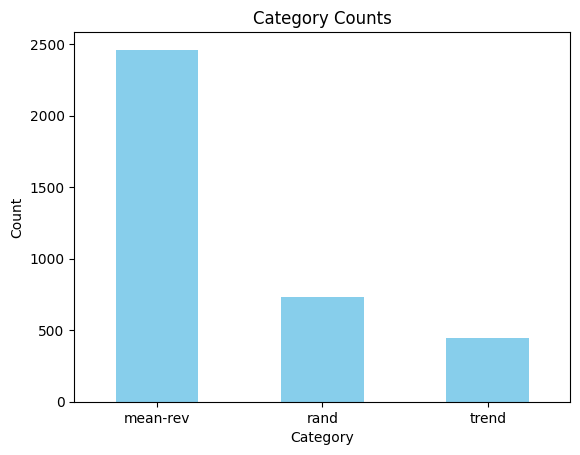

mean-rev    2461
rand         730
trend        445
Name: Trend_Category, dtype: int64


In [48]:
# Count the occurrences of each category
category_counts = df1['Trend_Category'].value_counts()

# Create a bar plot to visualize the counts
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the counts
print(category_counts)

In [49]:
# Calculate the moving average of the past n values of 'BOVA11'
df1['Moving_Average'] = df1['BOVA11'].rolling(window=n).mean()

df1

,Data,BOVA11,log_ret,Hurst,Trend_Category,Moving_Average
DataIndex,,,,,,
2008-11-28,2008-11-28,36.595870,NaN,NaN,NaN,NaN
2008-12-01,2008-12-01,34.744914,-0.051902,NaN,NaN,NaN
2008-12-02,2008-12-02,35.001588,0.007360,NaN,NaN,NaN
2008-12-03,2008-12-03,35.293783,0.008313,NaN,NaN,NaN
2008-12-04,2008-12-04,35.122046,-0.004878,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-09-25,2023-09-25,112.386518,-0.000710,0.474469,rand,113.419790
2023-09-26,2023-09-26,110.711942,-0.015012,0.462617,rand,113.458792
2023-09-27,2023-09-27,110.837986,0.001138,0.449804,mean-rev,113.504906


In [50]:
# Add a column 'Mean>Pt' to indicate if 'Moving_Average' is greater than BOVA11
df1['Mean>Pt'] = df1['Moving_Average'] > df1['BOVA11']
df1

,Data,BOVA11,log_ret,Hurst,Trend_Category,Moving_Average,Mean>Pt
DataIndex,,,,,,,
2008-11-28,2008-11-28,36.595870,NaN,NaN,NaN,NaN,False
2008-12-01,2008-12-01,34.744914,-0.051902,NaN,NaN,NaN,False
2008-12-02,2008-12-02,35.001588,0.007360,NaN,NaN,NaN,False
2008-12-03,2008-12-03,35.293783,0.008313,NaN,NaN,NaN,False
2008-12-04,2008-12-04,35.122046,-0.004878,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...
2023-09-25,2023-09-25,112.386518,-0.000710,0.474469,rand,113.419790,True
2023-09-26,2023-09-26,110.711942,-0.015012,0.462617,rand,113.458792,True
2023-09-27,2023-09-27,110.837986,0.001138,0.449804,mean-rev,113.504906,True


In [51]:
# Add a column 'Pt>Pt-1' to indicate if 'BOVA11' is greater than the previous value
df1['Pt>Pt-1'] = df1['BOVA11'] > df1['BOVA11'].shift(1)
df1

,Data,BOVA11,log_ret,Hurst,Trend_Category,Moving_Average,Mean>Pt,Pt>Pt-1
DataIndex,,,,,,,,
2008-11-28,2008-11-28,36.595870,NaN,NaN,NaN,NaN,False,False
2008-12-01,2008-12-01,34.744914,-0.051902,NaN,NaN,NaN,False,False
2008-12-02,2008-12-02,35.001588,0.007360,NaN,NaN,NaN,False,True
2008-12-03,2008-12-03,35.293783,0.008313,NaN,NaN,NaN,False,True
2008-12-04,2008-12-04,35.122046,-0.004878,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...
2023-09-25,2023-09-25,112.386518,-0.000710,0.474469,rand,113.419790,True,False
2023-09-26,2023-09-26,110.711942,-0.015012,0.462617,rand,113.458792,True,False
2023-09-27,2023-09-27,110.837986,0.001138,0.449804,mean-rev,113.504906,True,True


In [52]:
# Add a column 'Decision' based on your specified conditions
df1['Decision'] = 'hold' 

# Define conditions and update 'Decision' column accordingly
mean_rev_condition = (df1['Trend_Category'] == 'mean-rev')
trend_condition = (df1['Trend_Category'] == 'trend')
pt_condition = (df1['Pt>Pt-1'] == True)

df1.loc[mean_rev_condition & df1['Mean>Pt'], 'Decision'] = 'buy'
df1.loc[mean_rev_condition & ~df1['Mean>Pt'], 'Decision'] = 'sell'
df1.loc[trend_condition & pt_condition, 'Decision'] = 'buy'
df1.loc[trend_condition & ~pt_condition, 'Decision'] = 'sell'

df1

,Data,BOVA11,log_ret,Hurst,Trend_Category,Moving_Average,Mean>Pt,Pt>Pt-1,Decision
DataIndex,,,,,,,,,
2008-11-28,2008-11-28,36.595870,NaN,NaN,NaN,NaN,False,False,hold
2008-12-01,2008-12-01,34.744914,-0.051902,NaN,NaN,NaN,False,False,hold
2008-12-02,2008-12-02,35.001588,0.007360,NaN,NaN,NaN,False,True,hold
2008-12-03,2008-12-03,35.293783,0.008313,NaN,NaN,NaN,False,True,hold
2008-12-04,2008-12-04,35.122046,-0.004878,NaN,NaN,NaN,False,False,hold
...,...,...,...,...,...,...,...,...,...
2023-09-25,2023-09-25,112.386518,-0.000710,0.474469,rand,113.419790,True,False,hold
2023-09-26,2023-09-26,110.711942,-0.015012,0.462617,rand,113.458792,True,False,hold
2023-09-27,2023-09-27,110.837986,0.001138,0.449804,mean-rev,113.504906,True,True,buy


C:\Users\GabrielPedroso\AppData\Local\Temp\ipykernel_7920\501826281.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Portfolio_Value'] = portfolio_values
C:\Users\GabrielPedroso\AppData\Local\Temp\ipykernel_7920\501826281.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Portfolio_Return'] = df1['Portfolio_Value'].pct_change()


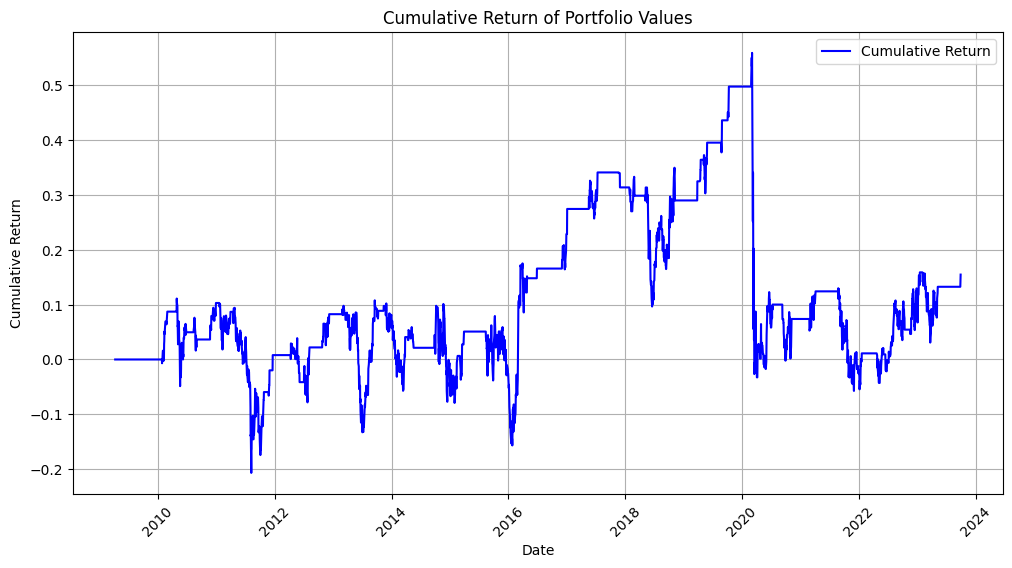

In [53]:
# Calculate daily returns of the 'BOVA11' stock
df1['Daily_Return'] = df1['BOVA11'].pct_change()

# Initialize variables for tracking portfolio values and positions
portfolio_value = 100000  # Starting portfolio value
position = 0  # Number of shares held
portfolio_values = []  # List to store portfolio values over time

# Slice the DataFrame to start after the nth value
df1 = df1.iloc[n:]

# Iterate through each row in the DataFrame and simulate trading
for index, row in df1.iterrows():
    decision = row['Decision']
    if decision == 'buy':
        # Buy shares with the entire available portfolio value
        shares_bought = portfolio_value / row['BOVA11']
        position += shares_bought
        portfolio_value = 0
    elif decision == 'sell':
        # Sell all shares
        portfolio_value += position * row['BOVA11']
        position = 0
    # Store the current portfolio value
    portfolio_values.append(portfolio_value + position * row['BOVA11'])

# Append the portfolio values as a new column in the DataFrame
df1['Portfolio_Value'] = portfolio_values

# Calculate daily portfolio returns
df1['Portfolio_Return'] = df1['Portfolio_Value'].pct_change()

# Calculate cumulative returns
cumulative_returns = (df1['Portfolio_Value'] / df1['Portfolio_Value'].iloc[0] - 1)

# Create a plot for cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df1.index, cumulative_returns, label='Cumulative Return', color='blue')
plt.title('Cumulative Return of Portfolio Values')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [54]:
# Get the first and last values of the 'Portfolio_Value' column
first_portfolio_value = df1['Portfolio_Value'].iloc[n]
last_portfolio_value = df1['Portfolio_Value'].iloc[-1]

# Calculate the cumulative return of the strategy
cumulative_return = ((last_portfolio_value / first_portfolio_value) - 1)*100

# Print the results
print("First Portfolio Value:", first_portfolio_value)
print("Last Portfolio Value:", last_portfolio_value)
print("Cumulative Return:", cumulative_return, "%")

First Portfolio Value: 100000.0
Last Portfolio Value: 115491.34222200462
Cumulative Return: 15.491342222004612 %


In [55]:
# Get the first and last values of the 'BOVA11' column
first_bova11_value = df1['BOVA11'].iloc[n]
last_bova11_value = df1['BOVA11'].iloc[-1]

# Calculate the cumulative return of 'BOVA11'
cumulative_return_bova11 = ((last_bova11_value / first_bova11_value) - 1)*100

# Print the results
print("First BOVA11 Value:", first_bova11_value)
print("Last BOVA11 Value:", last_bova11_value)
print("Cumulative Return of BOVA11:", cumulative_return_bova11, "%")

First BOVA11 Value: 55.774103
Last BOVA11 Value: 113.015405
Cumulative Return of BOVA11: 102.63060976525256 %
